In [91]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.stats import linregress


In [72]:

data_df=pd.read_csv("exp_v_obser_2020.csv")

data_df

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
0,1/14/2017,Alabama,"1,130","1,199",False,"1,042",0,88,2017,"3,256","5,112",0.0,0.1,Predicted (weighted),All causes,NaN,NaN
1,1/21/2017,Alabama,"1,048","1,214",False,"1,057",0,0,2017,"3,256","5,112",0.0,0.0,Predicted (weighted),All causes,NaN,NaN
2,1/28/2017,Alabama,"1,026","1,233",False,"1,076",0,0,2017,"3,256","5,112",0.0,0.0,Predicted (weighted),All causes,NaN,NaN
3,2/4/2017,Alabama,"1,036","1,231",False,"1,074",0,0,2017,"3,256","5,112",0.0,0.0,Predicted (weighted),All causes,NaN,NaN
4,2/11/2017,Alabama,"1,058","1,224",False,"1,071",0,0,2017,"3,256","5,112",0.0,0.0,Predicted (weighted),All causes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31261,8/29/2020,North Carolina,NaN,"1,874",False,"1,752",NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,"Suppressed (counts highly incomplete, <50% of ...",Data in recent weeks are incomplete. Only 60% ...
31262,9/5/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
31263,9/12/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
31264,9/19/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...


In [73]:
data_2020=data_df[data_df['Year']==2020]

In [74]:
data_2020

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
155,4/11/2020,New York City,"7,930","1,121",True,"1,042","6,809","6,888",2020,"25,455","27,088",6.1,6.6,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
156,4/11/2020,New York City,"7,863","1,121",True,"1,042","6,742","6,821",2020,"25,184","26,549",6.0,6.5,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
157,4/4/2020,New York City,"6,296","1,135",True,"1,053","5,161","5,243",2020,"25,455","27,088",4.5,5.0,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
158,4/4/2020,New York City,"6,296","1,135",True,"1,053","5,161","5,243",2020,"25,184","26,549",4.5,5.0,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
159,4/18/2020,New York City,"5,951","1,112",True,"1,032","4,839","4,919",2020,"25,455","27,088",4.4,4.8,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31261,8/29/2020,North Carolina,NaN,"1,874",False,"1,752",NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,"Suppressed (counts highly incomplete, <50% of ...",Data in recent weeks are incomplete. Only 60% ...
31262,9/5/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
31263,9/12/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
31264,9/19/2020,North Carolina,NaN,NaN,False,NaN,NaN,NaN,2020,506,"2,320",NaN,NaN,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...


In [75]:
exces_hi_est=pd.DataFrame(data_2020.groupby("State")["Percent Excess Higher Estimate"].mean())

In [76]:
exces_lo_est=pd.DataFrame(data_2020.groupby("State")["Percent Excess Lower Estimate"].mean())

In [77]:
exces_hi_est

,Percent Excess Higher Estimate
State,
Alabama,0.098246
Alaska,0.046491
Arizona,0.159649
Arkansas,0.077193
California,0.091228
Colorado,0.096491
Connecticut,0.152212
Delaware,0.130702
District of Columbia,0.230702


In [78]:

exces_lo_est

,Percent Excess Lower Estimate
State,
Alabama,0.050877
Alaska,0.000877
Arizona,0.096491
Arkansas,0.026316
California,0.051754
Colorado,0.040351
Connecticut,0.106195
Delaware,0.036842
District of Columbia,0.086842


In [79]:
hi10=exces_hi_est.nlargest(20,"Percent Excess Higher Estimate")

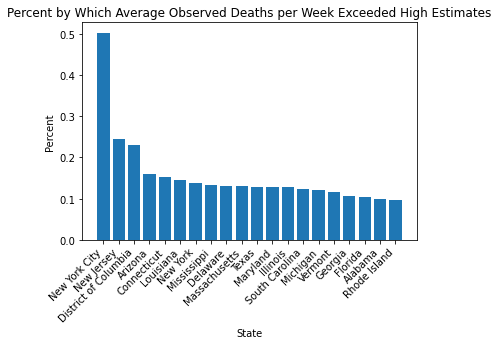

In [80]:
fig, ax=plt.subplots()

ax.bar(hi10.index, hi10["Percent Excess Higher Estimate"])

labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')

plt.title('Percent by Which Average Observed Deaths per Week Exceeded High Estimates')
plt.xlabel('State')
plt.ylabel('Percent')

plt.show()

In [81]:
low10=exces_lo_est.nlargest(20,"Percent Excess Lower Estimate")
type(low10["Percent Excess Lower Estimate"])

pandas.core.series.Series

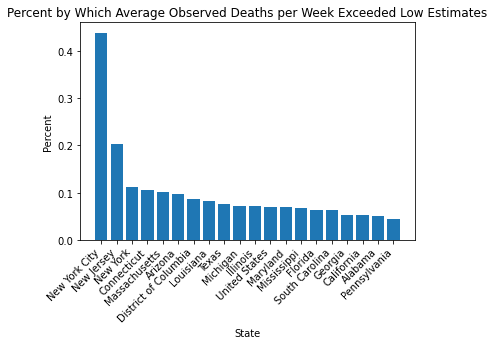

In [82]:
fig, ax=plt.subplots()

ax.bar(low10.index, low10["Percent Excess Lower Estimate"])

labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')

plt.title('Percent by Which Average Observed Deaths per Week Exceeded Low Estimates')
plt.xlabel('State')
plt.ylabel('Percent')

plt.show()

In [83]:
pop_dist=pd.read_csv("state_dist.csv")

In [84]:
pop_dist["Per Urban"]=pop_dist["Urban"]/pop_dist["Total"]

In [85]:
pop_dist

,State,Urban,Rural,Total,Per Urban
0,Alabama,2821804,1957932,4779753,0.590366
1,Alaska,468893,241342,710235,0.660194
2,Arizona,5740659,651358,6392017,0.898098
3,Arkansas,1637589,1278329,2915919,0.561603
4,California,35373606,1880350,37253956,0.949526
5,Colorado,4332761,696435,5029196,0.861522
6,Connecticut,3144942,429155,3574097,0.879926
7,Delaware,747949,149985,897934,0.832967
8,District of Columbia,601723,0,601767,0.999927
9,Florida,17139844,1661466,18801332,0.911629


In [86]:
exces_hi_est

,Percent Excess Higher Estimate
State,
Alabama,0.098246
Alaska,0.046491
Arizona,0.159649
Arkansas,0.077193
California,0.091228
Colorado,0.096491
Connecticut,0.152212
Delaware,0.130702
District of Columbia,0.230702


In [110]:
only_states=pop_dist.drop(51, axis=0)

hi_clean=exces_hi_est.drop("New York City",axis=0)
hi_clean=hi_clean.drop("Puerto Rico",axis=0)
hi_clean=hi_clean.drop("United States",axis=0).reset_index()

lo_clean=exces_lo_est.drop("New York City",axis=0)
lo_clean=lo_clean.drop("Puerto Rico",axis=0)
lo_clean=lo_clean.drop("United States",axis=0).reset_index()

df=pd.DataFrame([only_states["State"], only_states["Per Urban"], hi_clean["Percent Excess Higher Estimate"], lo_clean["Percent Excess Lower Estimate"]])
df=df.transpose()
df

,State,Per Urban,Percent Excess Higher Estimate,Percent Excess Lower Estimate
0,Alabama,0.590366,0.0982456,0.0508772
1,Alaska,0.660194,0.0464912,0.000877193
2,Arizona,0.898098,0.159649,0.0964912
3,Arkansas,0.561603,0.077193,0.0263158
4,California,0.949526,0.0912281,0.0517544
5,Colorado,0.861522,0.0964912,0.0403509
6,Connecticut,0.879926,0.152212,0.106195
7,Delaware,0.832967,0.130702,0.0368421
8,District of Columbia,0.999927,0.230702,0.0868421
9,Florida,0.911629,0.103509,0.0631579


Text(0, 0.5, 'Percentage Exceeding Expected Deaths')

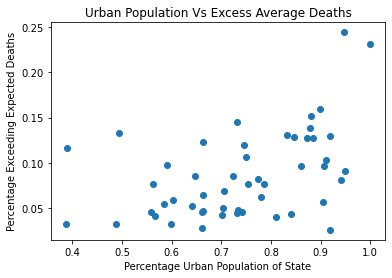

In [111]:
# Generate scatter plot
plt.scatter(df["Per Urban"], df["Percent Excess Higher Estimate"])
plt.title(f"Urban Population Vs Excess Average Deaths")

plt.xlabel("Percentage Urban Population of State")
plt.ylabel("Percentage Exceeding Expected Deaths")

Text(0, 0.5, 'Percentage Exceeding Expected Deaths')

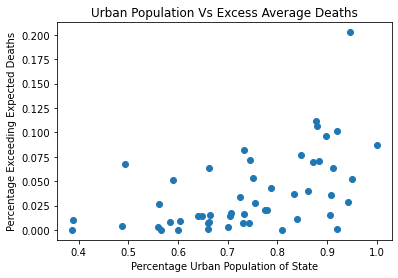

In [112]:
# Generate scatter plot
plt.scatter(df["Per Urban"], df["Percent Excess Lower Estimate"])
plt.title(f"Urban Population Vs Excess Average Deaths")

plt.xlabel("Percentage of State Population Urban")
plt.ylabel("Percentage of Average Weekly Deaths Exceeding Expected Deaths")

The r-squared is: 0.21228261011632432


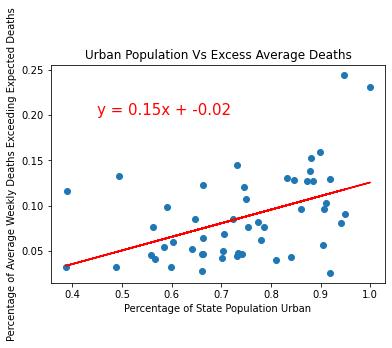

In [115]:

plt.scatter(df["Per Urban"], df["Percent Excess Higher Estimate"])
plt.title(f"Urban Population Vs Excess Average Weekly Deaths")

plt.xlabel("Percentage of State Population Urban")
plt.ylabel("Percentage of Average Weekly Deaths Exceeding Expected Deaths")
# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(df["Per Urban"].astype(float), df["Percent Excess Higher Estimate"].astype(float))
regress_values = df['Per Urban'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(df['Per Urban'], df['Percent Excess Higher Estimate'])

# Plot regression
plt.plot(df['Per Urban'],regress_values,"r-")
plt.annotate(line_eq,(.45,.2),fontsize=15,color="red")
plt.savefig(r'coor_hi.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2717382258237539


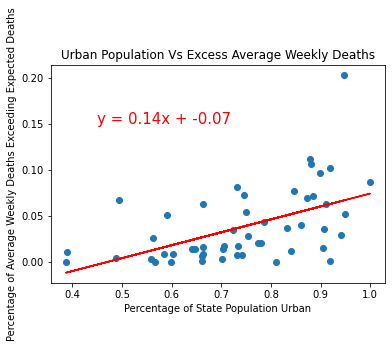

In [118]:
plt.scatter(df["Per Urban"], df["Percent Excess Lower Estimate"])
plt.title(f"Urban Population Vs Excess Average Weekly Deaths")

plt.xlabel("Percentage of State Population Urban")
plt.ylabel("Percentage of Average Weekly Deaths Exceeding Expected Deaths")
# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(df["Per Urban"].astype(float), df["Percent Excess Lower Estimate"].astype(float))
regress_values = df_hi['Per Urban'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(df['Per Urban'], df['Percent Excess Lower Estimate'])

# Plot regression
plt.plot(df['Per Urban'],regress_values,"r-")
plt.annotate(line_eq,(.45,.15),fontsize=15,color="red")
plt.savefig(r'coor_lo.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()